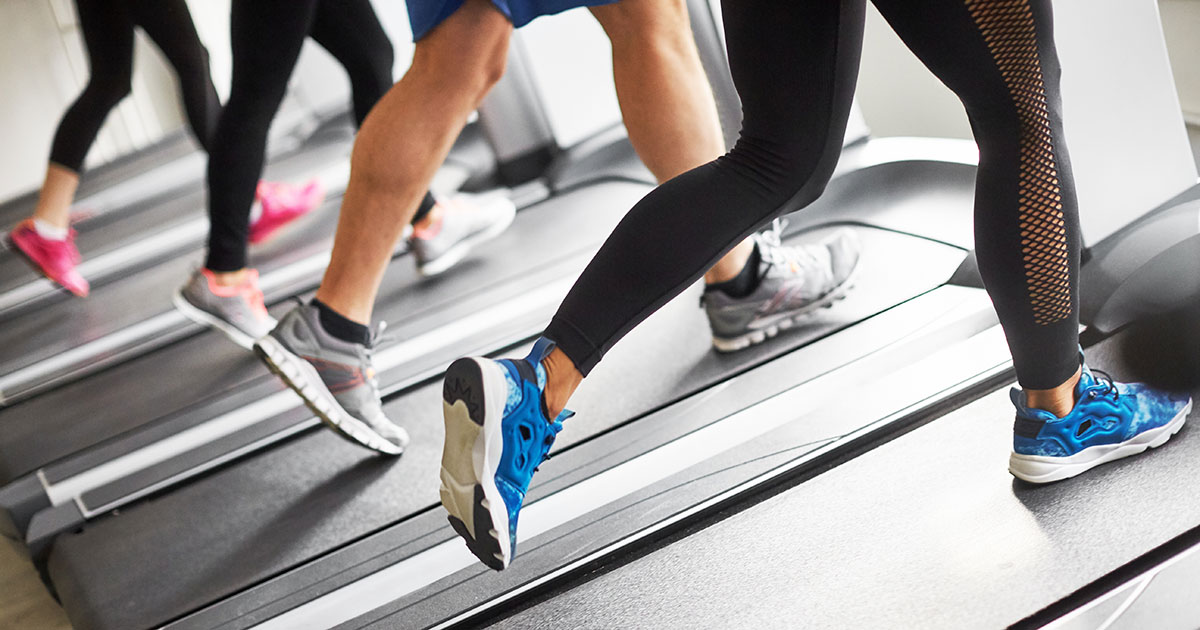



# Project 1: Cardio Good Fitness

Key Questions

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analysis
3. Generate a set of insights and recommendations that will help the company in targeting new customers

This data set contains the following information
Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables
1.	Product - the model no. of the treadmill
2.	Age - in no of years, of the customer
3.	Gender - of the customer
4.	Education - in no. of years, of the customer
5.	Marital Status - of the customer
6.	Usage - Avg. # times the customer wants to use the treadmill every week
7.	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.	Income - of the customer
9.	Miles- expected to run


# 1 - Loading Necessary Libraries, pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
# !pip install pandas-profiling==2.8.0 (Package needed for Profiling)

# 2 - Importing Data Set

In [2]:
cardiodata = pd.read_csv ('CardioGoodFitness.csv') #Importing/Opening Data file
df=cardiodata.copy() #Creating a copy of the data to prevent changes to main data set

# 3 - Viewing data head/ First 10

In [3]:
cardiodata.head(10) #Viewing first 10 Information contained information in data set

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


# 4 - Statistical Summary

In [4]:
cardiodata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation**
1. The Average level of education is about 15.57
2. The Min Income is about 29562 and the max is 104581
3. The level of Fitness goes from 1 to 5 as referenced in data information which is good


# 5 - Data Shape


In [5]:
cardiodata.shape

(180, 9)

* There are 180 rows and 9 Column in this data set

# 6 - Data Type for each colum

In [6]:
cardiodata.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

**Observation**
1. We see that Product, Gender, Maritial Status are of type Object (String)
2. We See that that Age, Gender, Education, Usage, Fitness, Miles, Income are of type int

# 7 - Checking for missing data in complete file

In [7]:
#cardiodata.isnull().sum() 
pd.DataFrame( cardiodata.isnull().sum(), columns= ['Total Missing Values']) #Counted Missing will be displayed in new column

,Total Missing Values
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Observation**
* There are no missing data

# 8 - Number of Products for Each Type

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

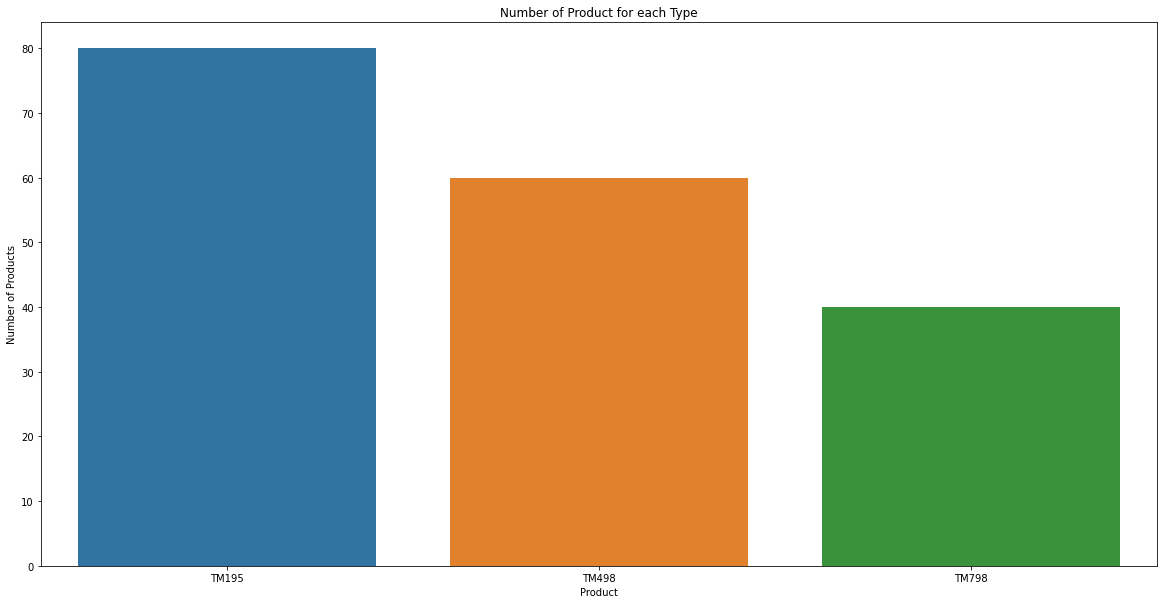

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='Product', data=cardiodata)  #Ploting graph to see most Popular product
plt.title('Number of Product for each Type') #Name that will be assigned to plot
plt.ylabel('Number of Products')             #Label (name) for Y axis
plt.xlabel('Product')                        #Label (name) for X axis

cardiodata['Product'].value_counts(ascending=False) #Counting number for each type of product

**Observation**
* Per the graph and count for the number of the people using the product, we can see that the most popular product is TM195 at 80, followed by TM498 at 60 and TM798 at 40.

# 9 - Checking most popular gender

Male      104
Female     76
Name: Gender, dtype: int64

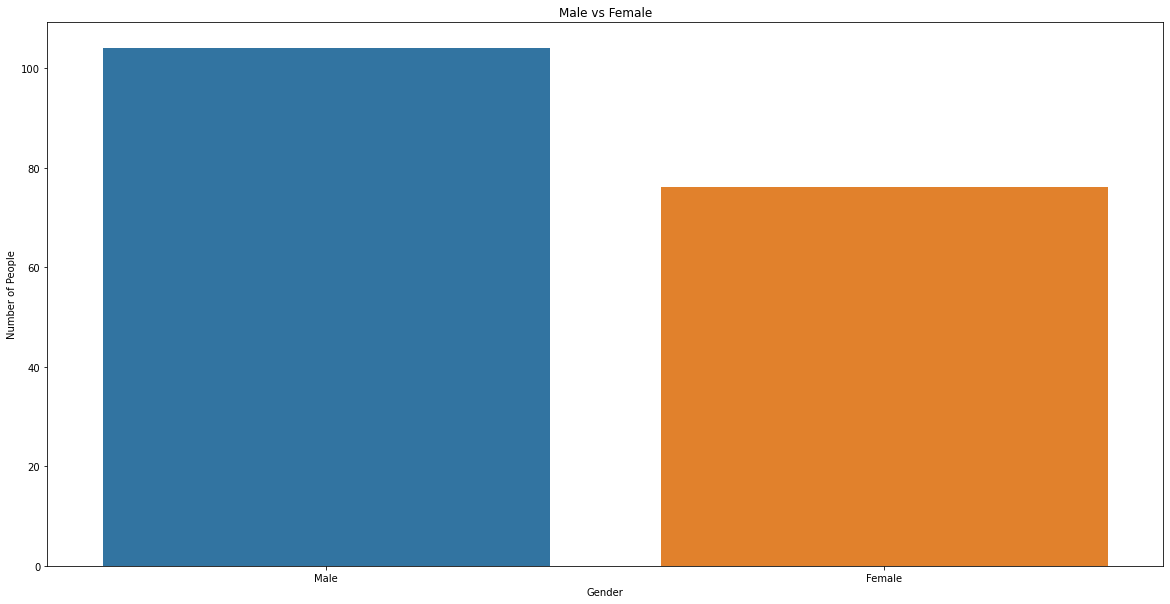

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='Gender', data=cardiodata)  #Ploting graph to see most Men vs Women Number in Data set
plt.title('Male vs Female')                 #Name that will be assigned to plot
plt.ylabel('Number of People')              #Label (name) for Y axis
plt.xlabel('Gender')                        #Label (name) for X axis
cardiodata['Gender'].value_counts(ascending=False) #Counting Gender (Male and Female in Data Set)

**Observation**

* Per the graph and count for the number of the gender types in the data set, we can see that we have more men (104) using the products than women (76)


# 10 - Checking for most Popular Marital Status

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

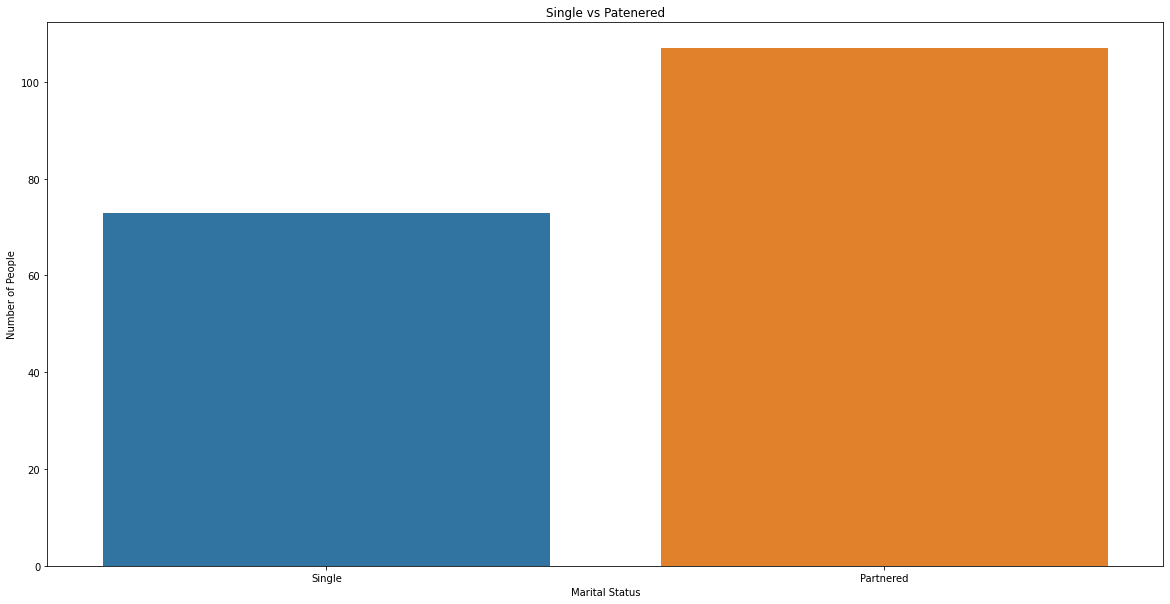

In [10]:
plt.figure(figsize=(20,10))                       #Making figure appear bigger
sns.countplot(x='MaritalStatus', data=cardiodata) #Ploting graph to see most popular Marital Status in Data set
plt.title('Single vs Patenered')                  #Name that will be assigned to Plot
plt.ylabel('Number of People')                    #Label (name) for Y axis
plt.xlabel('Marital Status')                      #Label (name) for X axis

cardiodata['MaritalStatus'].value_counts(ascending=False) #Counting MaritalStatus (Single vs Partnered)

**Observation**
* We see that we have more Partnered people in the data set which mean more partnered people use the treadmills compared to single

# 11 - Most Popular Age Bracket

Text(0, 0.5, 'Number of People')

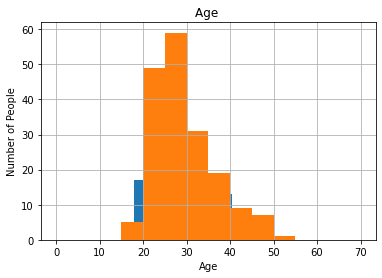

In [11]:
cardiodata.hist('Age')                         #Ploting graph to show Age brackets
plt.hist(cardiodata['Age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]) #Making age brackets more visible
plt.title('Age ')                              #Name that will be assigned to Plot
plt.xlabel('Age')                              #Label (name) for X coordinates
plt.ylabel ('Number of People')                #Label (name) for Y coordinates

**Observation**
1. Per the information above, we see that most people that use treadmills are between the age of 25-30
2. We also see that people between the age of 20 to 25 are the second highest user of the products
3. We also see that as people are getting older, their use of the products is declining 

# 12 - Years Of Education Completed

Text(0, 0.5, 'Number of people')

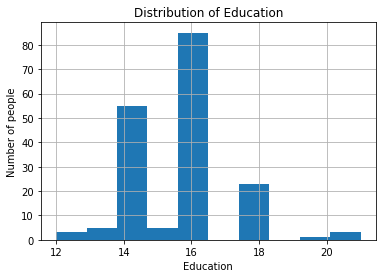

In [12]:
cardiodata.hist('Education')                 #Ploting graph to see the level of education for most users
plt.title('Distribution of Education')       #Name that will be assigned to Plot
plt.xlabel('Education')                      #Label (name) for X axis
plt.ylabel('Number of people')               ##Label (name) for Y axis

**Observation**

1. We see that the level of education is between 12 - 20 years
2. The heighest product users have completed a 16 years of education
3. The second heighest users have completed a 14 years of education
4. The third heighest users have completed 18 years of education
5. The fourth heighest users have completed 13 or 15 years of education
6. The fifth heighest users have completed 12 or 20 years of education
7. The lowest number of users have completed a 19 years of education

# 13 - Income

Text(0, 0.5, 'Number of People')

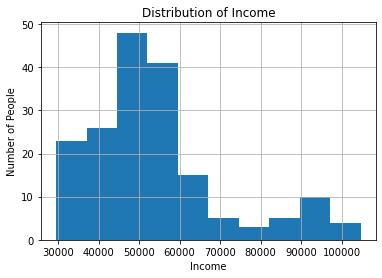

In [13]:
cardiodata.hist('Income')              #Ploting graph to see the heighest level of education for most users
plt.title('Distribution of Income')    #Name that will be assigned to Plot
plt.xlabel('Income')                   #Label (name) for X axis
plt.ylabel('Number of People')         #Label (name) for Y axis

**Observation**
* We see that there is a higher concentration of people making between 30,000 and 60,000

# 14 - Miles

Text(0, 0.5, 'Number of people Running')

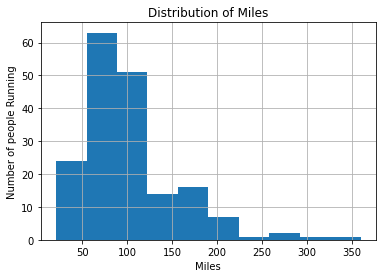

In [14]:
cardiodata.hist('Miles')                #Ploting graph to see the heighest number mile run by users
plt.title('Distribution of Miles')      #Name that will be assigned to Plot
plt.xlabel('Miles')                     #Label (name) for X axis 
plt.ylabel('Number of people Running')  #Label (name) for Y axis 

**Observation**
1. We see that most people run between 21 to 125 Miles
2. This is followed by people that run about 125 to 200 miles
3. We see very few people run between 200 and 350 Miles

# 15 - Product Usage

Text(0, 0.5, 'Number of People')

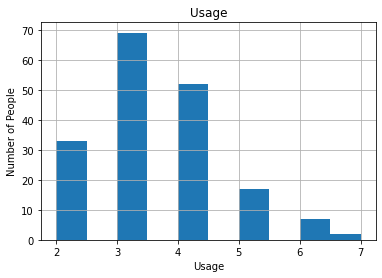

In [15]:
cardiodata.hist('Usage')               #Ploting graph to see the heighest number of days the products is used
plt.title('Usage')     #Name that will be assigned to Plot
plt.xlabel('Usage')                    #Label (name) for X axis
plt.ylabel('Number of People')         #Label (name) for Y axis

**Obervation**
1. We see that have a higher number of people using the product 3 times a week
2. We see that second highest group of people uses the product 4 times a week
3. We see that the third highest group of people uses the product at 2 times a week
4. We see that the fourth group of people uses the product at 5 times a week
5. We see that the fifth group of people uses the product at 6 times a week
6. We see that the sixth group of people uses the product at 7 times a week

# 16 - Product vs Usage

Text(0.5, 1.0, 'Product vs Usage')

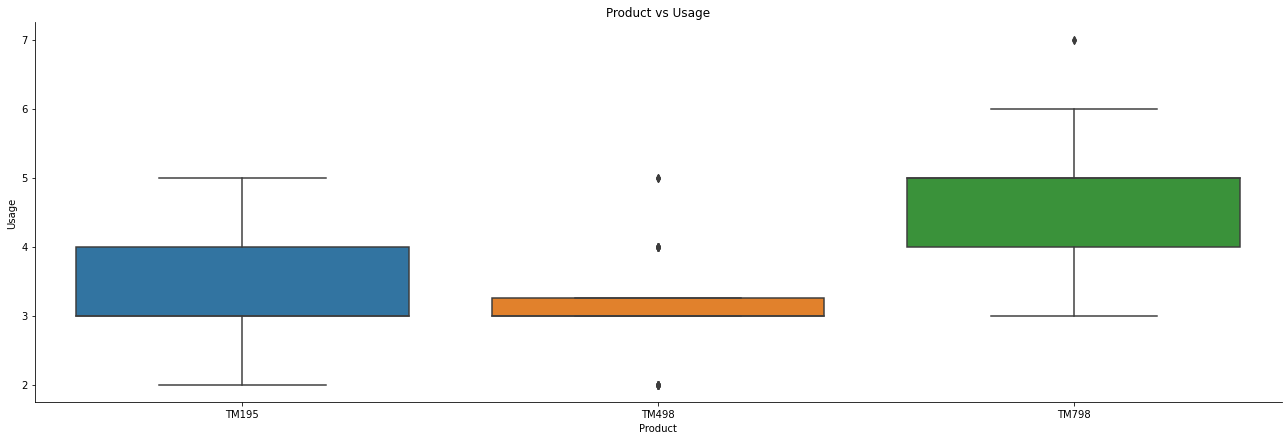

In [16]:
#Plotting Box Plot to show Product vs Usage
sns.catplot(x="Product", y="Usage", kind = "box", data=cardiodata, height=6, aspect=3)
plt.title('Product vs Usage')  #Plot title

**Observation**
1. We see that people with high usage tend to go with product TM798
2. We see that people with medium usage tend to go with product TM498
3. We see that people with Low usage tend to go with product TM195

# 17 - Product vs Income

Text(0.5, 1.0, 'Product vs Income')

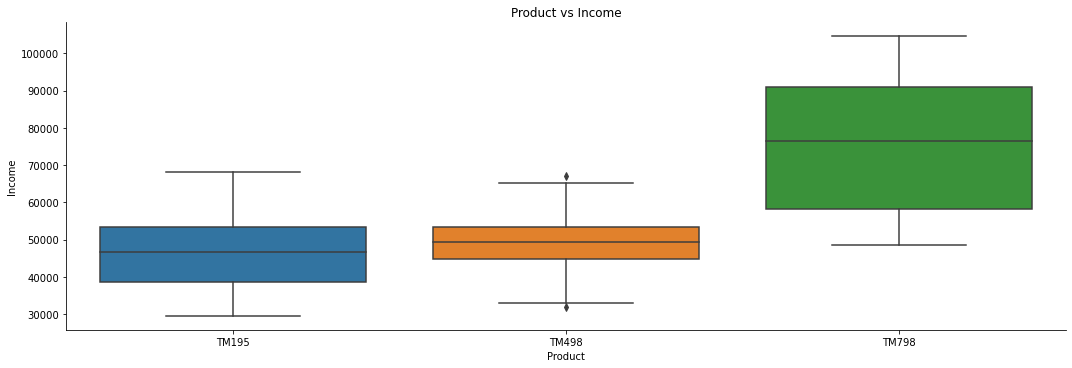

In [17]:
#Plotting Box Plot to show Product vs Income
sns.catplot(x="Product", y="Income", kind = "box", data=cardiodata, height=5, aspect=3)
plt.title('Product vs Income')#Plot title
#The graph below is an example of Multivariate Analysis

**Observation**
1. We see that people with high income tend to go with product TM798
2. We see that people with medium income tend to go with product TM195
3. We see that people with Low income tend to go with product TM498

# 18 - Product vs Years of Education

Text(0.5, 1.0, 'Product vs Education')

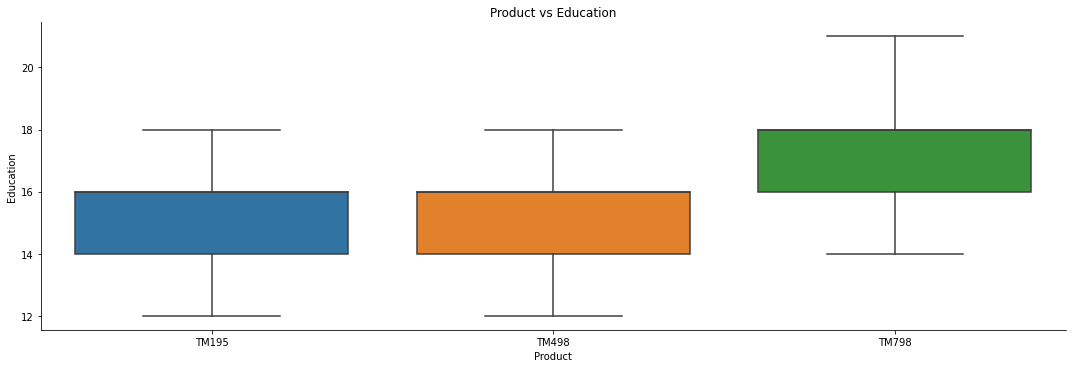

In [18]:
#Plotting Box Plot to show Product vs Education
sns.catplot(x="Product", y="Education", kind = "box", data=cardiodata, height = 5, aspect= 3)
plt.title('Product vs Education')#Plot title
#The graph below is an example of Multivariate Analysis

**Observation**
1. We see that people with a Higher level of education tend to go with the TM798
2. While the level of education does not seem to affect the rest of the group

# 19 - Product vs Income

Text(0.5, 1.0, 'Product vs Income')

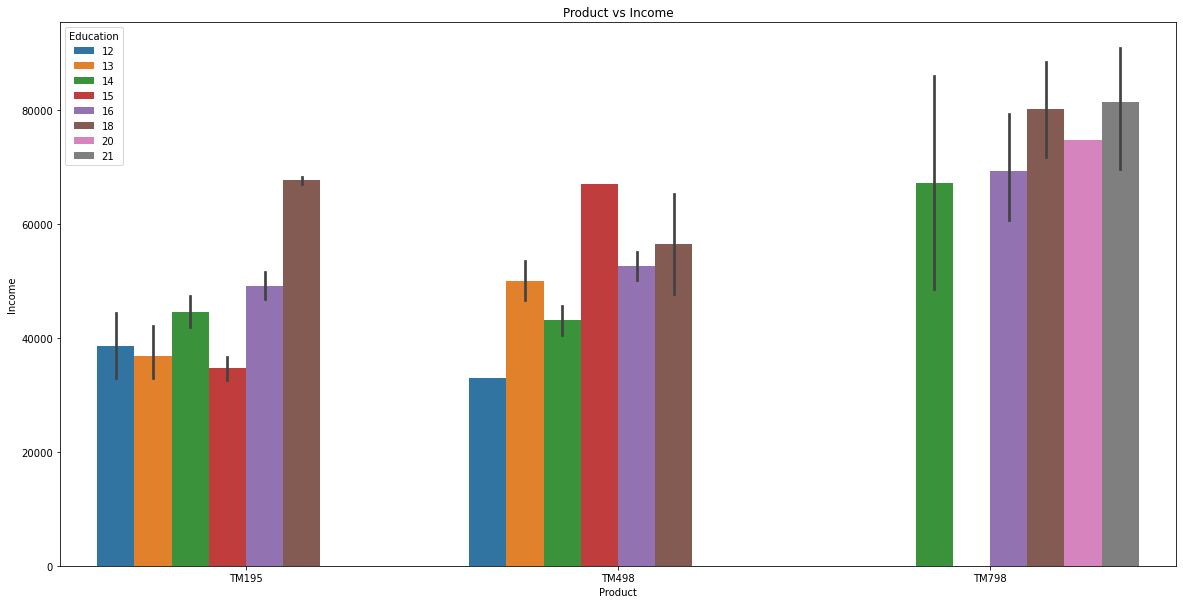

In [19]:
plt.figure(figsize=(20,10))           #Adjusting plot width to 20 and height to 10
#Plotting Box Plot to show Product vs Income sorted by Years of Education
sns.barplot(x="Product", y="Income", hue="Education", data=cardiodata)
plt.title('Product vs Income') #Plot title
#The graph below is an example of Multivariate Analysis

**Observation**
* We see that people with higher number of education have higher income and tend to go with the TM798 and not nuch difference between the other 2 categories which led me to the conclusion that the type of prodcut people buy MAY be affected by their income and the usage.


# 20 - Product vs Usage

<Figure size 1440x720 with 0 Axes>

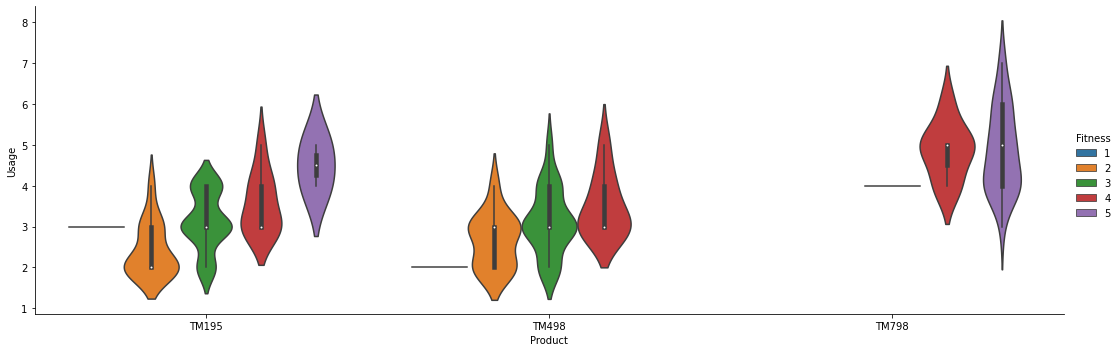

In [20]:
plt.figure(figsize=(20,10))         #Adjusting plot width to 20 and height to 10

#Plotting Violion Plot to show Product vs Usage sorted by Years of Fitness level
sns.catplot(x="Product", y="Usage", hue="Fitness",kind="violin", data=cardiodata, height=5,  aspect=3)
#The graph below is an example of Multivariate Analysis

**Observation**
1. We see that people with the High level of fitness and high fitness rating tend to go for TM798
2. We see that the 2 other products seem to be not be affected

# 21 - Miles vs Fitness

Text(0.5, 0, 'Fitness')

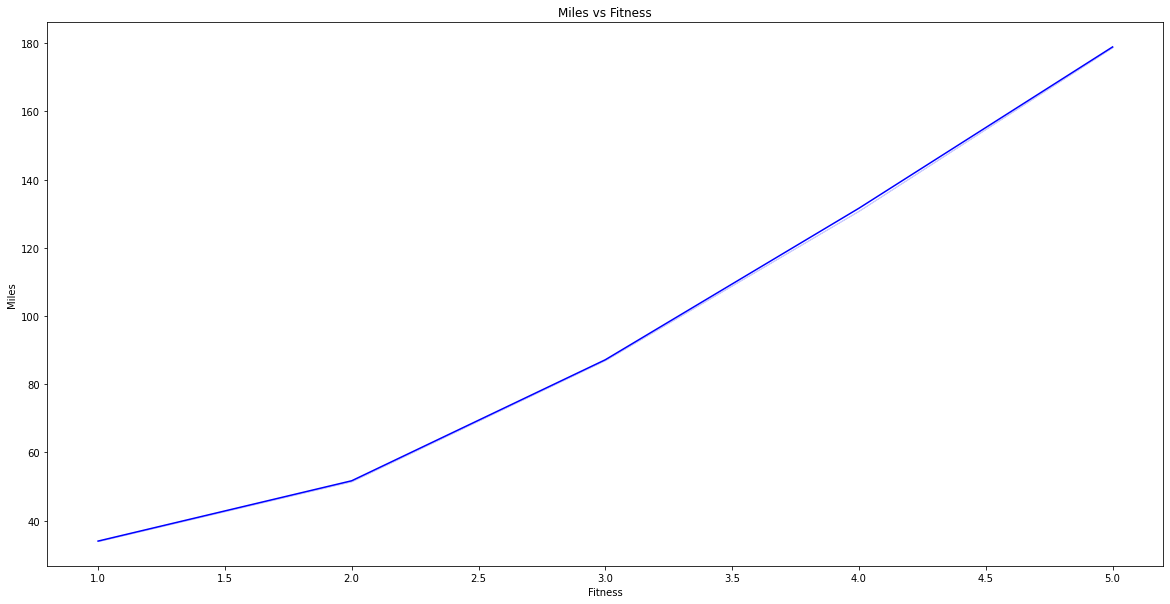

In [21]:
plt.figure(figsize=(20,10)) #Adjusting plot width to 20 and height to 10

#Plotting Line Plot to show Product vs Usage sorted by Years of Fitness level
sns.lineplot(y="Miles", x="Fitness",data=cardiodata,ci=0,color="BLUE")

plt.title('Miles vs Fitness')                 #Plot title
plt.ylabel('Miles')                           #Label (name) for Y axis
plt.xlabel('Fitness')                         #Label (name) for X axis
#The graph below is an example of Multivariate Analysis

**Observation**
* As we can see the higher the miles, the higher the level of fitness

# 22 - Product vs Miles

Text(0.5, 1.0, 'Product vs Miles')

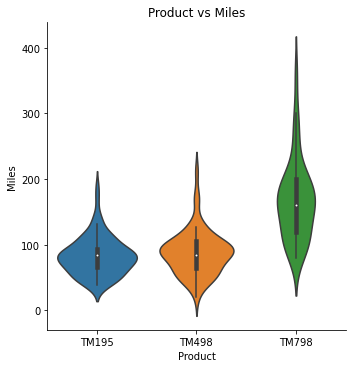

In [22]:
#Plotting Violin Plot to show Product vs Miles
sns.catplot(y="Miles", x="Product",kind="violin", data=cardiodata)
plt.title('Product vs Miles')       #Plot Title
#The graph below is an example of Multivariate Analysis

**Observation**
1. People with high miles go for TM798
2. People with medium miles go for TM498
3. People with low miles go for TM195

# 23 - Product vs Usage

Text(0.5, 1.0, 'Product vs Usage')

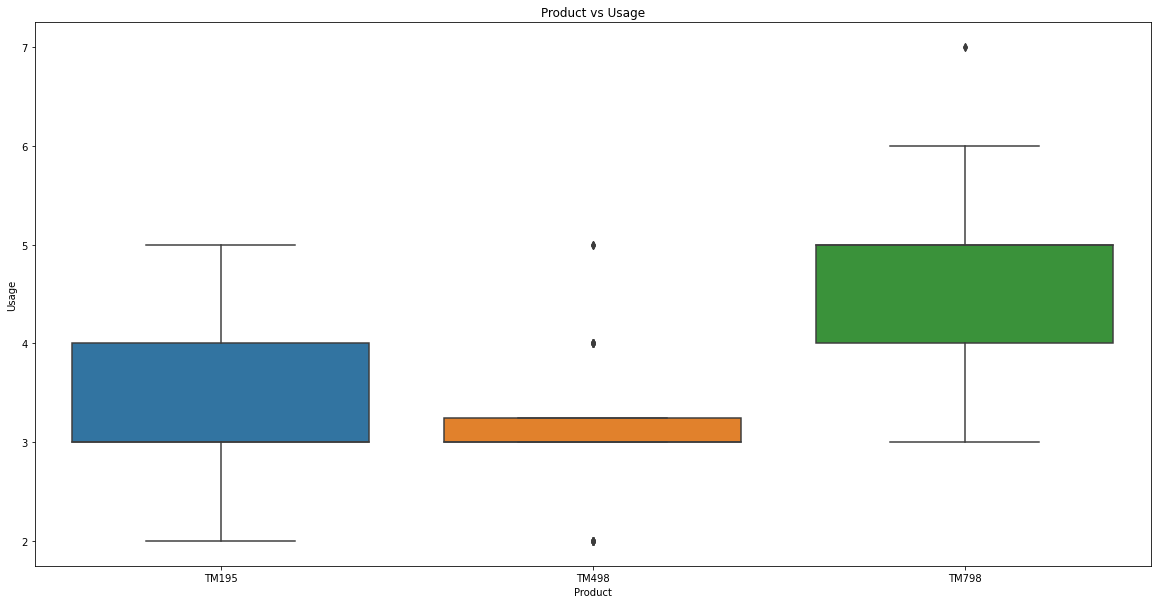

In [23]:
#Plotting Box Plot to show Product vs Miles
plt.figure(figsize=(20,10))           
sns.boxplot(cardiodata['Product'],cardiodata['Usage']) 
plt.ylabel('Usage')
plt.xlabel('Product')
plt.title('Product vs Usage')
#The graph below is an example of Multivariate Analysis

**Observation**
* People with higher number of usage per week are going for TM798

# 24 - Marital Status vs Income

Text(0.5, 0, 'Marital Status')

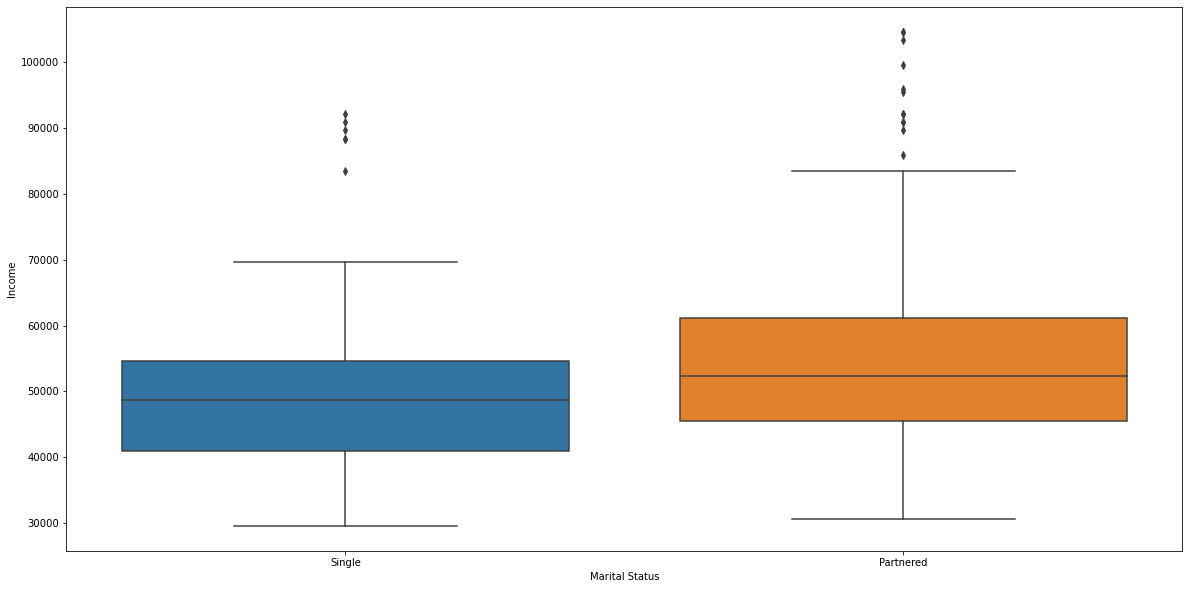

In [24]:
plt.figure(figsize=(20,10))           
sns.boxplot(cardiodata['MaritalStatus'],cardiodata['Income'])
plt.ylabel('Income')
plt.xlabel('Marital Status')
#The graph below is an example of Multivariate Analysis

**Observation**
* Partenered people have a higher income compared to Single people

# 25 - Age Distrubtion vs Product

Text(0.5, 1.0, 'Age distribution vs Product')

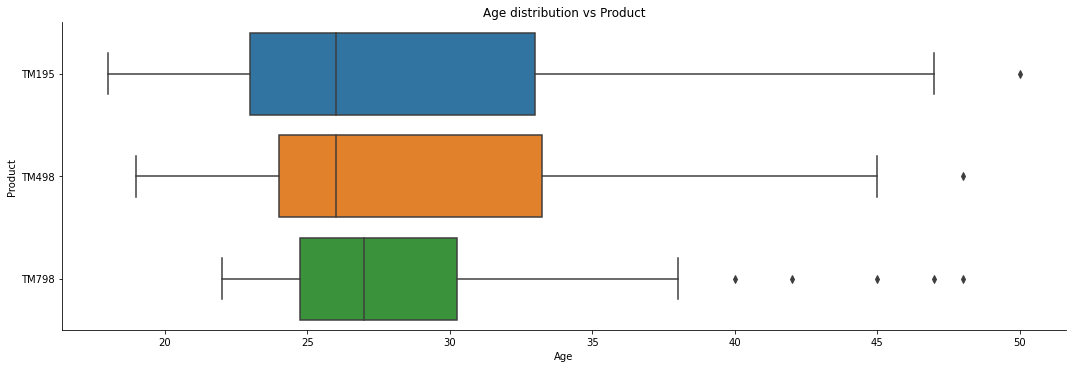

In [25]:
#Plotting Box Plot to show Age vs Product
sns.catplot(x="Age", y="Product", kind = "box", data=cardiodata, height = 5, aspect= 3)
plt.title('Age distribution vs Product')#Plot title
#The graph below is an example of Multivariate Analysis

**Oberservation**
* This plot confirms that most people use the TM195, followed by the TM498 and TM798

# 26 - Checking for correlation

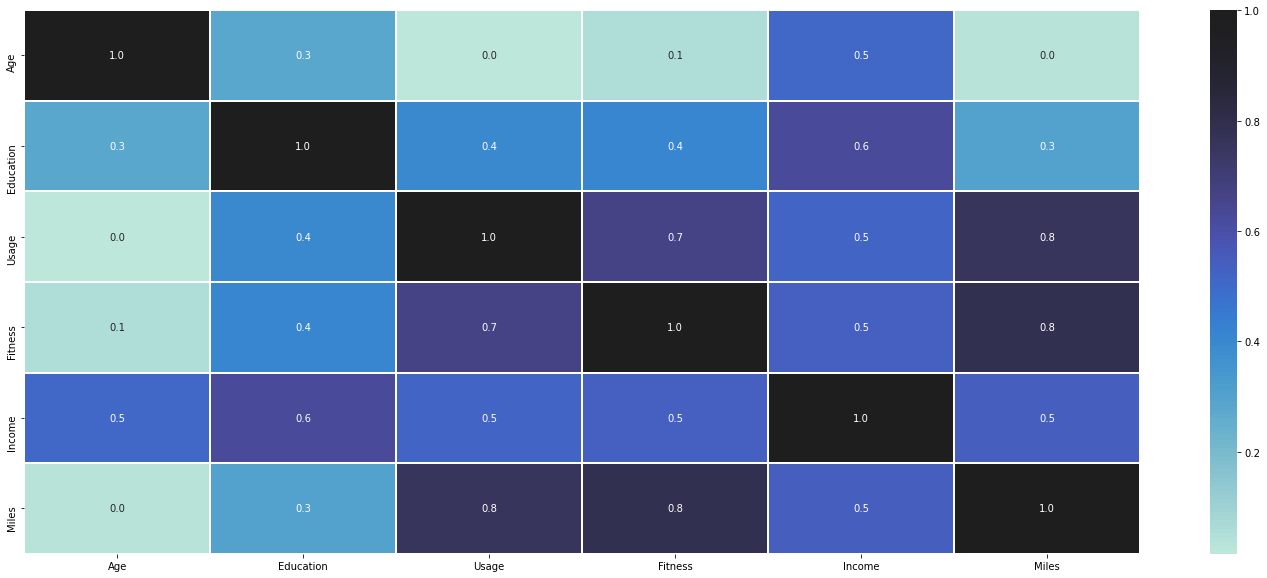

In [26]:
plt.figure(figsize=(25,10))
sns.heatmap(cardiodata.corr(), annot=True, linewidths=1, fmt= '.01f', center = 1 )  # heatmap
plt.show()
#The heatmap below is an example of Multivariate Analysis

**Observation**
1. As expected, Usage and Fitness Level have a high Correlation
2. Usage and Miles used also has a high correlation which makes sense as the users will chose products based on how they intend to use them
3. Fitness Level and Miles have a high correlation as well which is also normal because the higher your level, the more you exercise



# 27 - Bivariate Scatter Plots

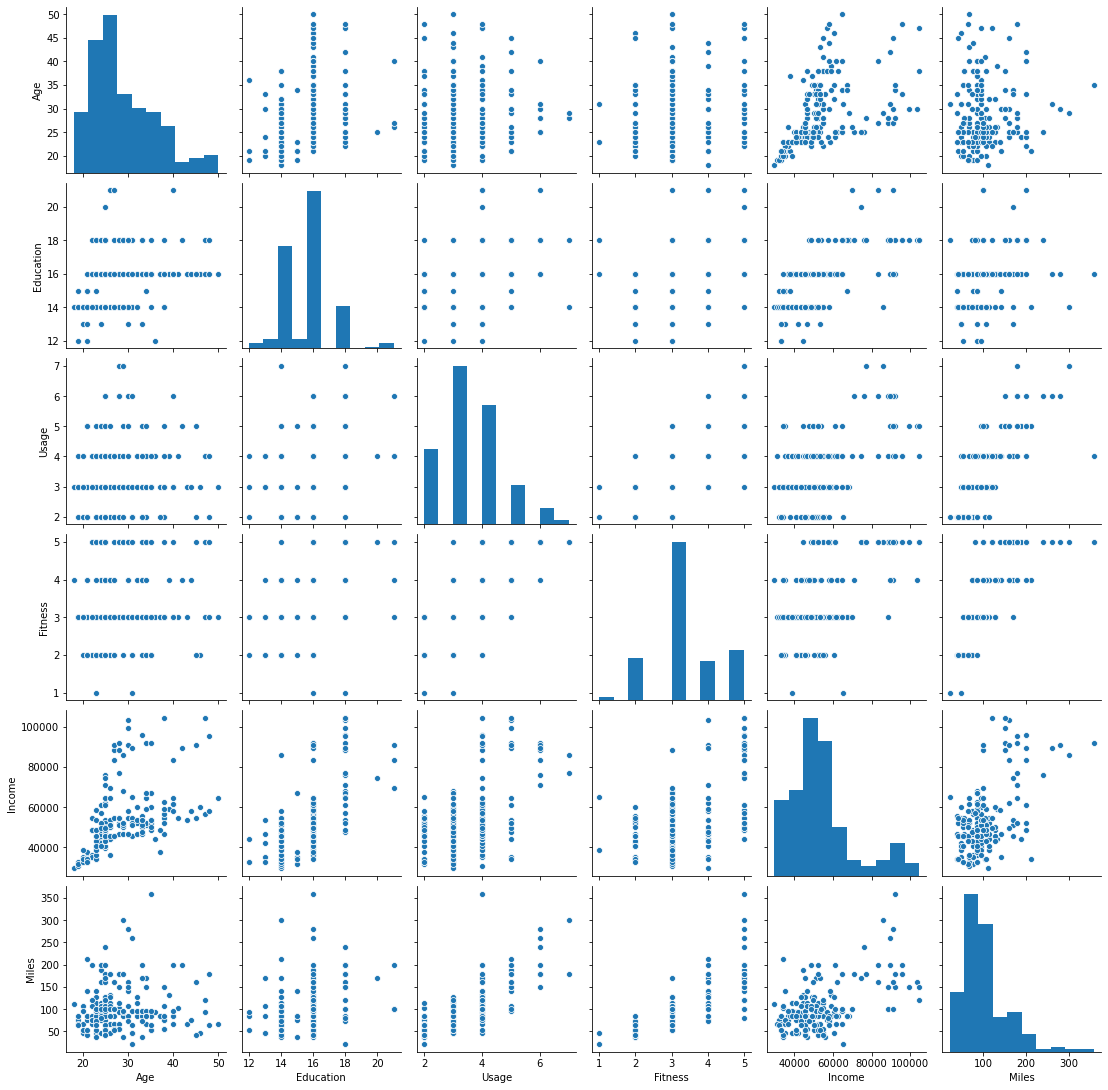

In [27]:
sns.pairplot(cardiodata)

**Observation**
* We see the same patterns of correlation as seen on the correlation heat map

# 27 - **Conclusion and Recommendations**

**Based on the information found after analysis this data set, we see that:**

1. The number of men using the products (treadmill) is higher that the women
2. The type of treadmill used also depends on a person's level of fitness and the amount of miles it will be used for which led to the conclusion that the TM798 is the high-end treadmill
3. The people who completed a higher level of education tend to go with the high-end treadmill
4. The income also has an impact on the type of product as one will expect
5. More partnered people have treadmills than single people

**Customer profiles for each products**

**- For the most used Product, TM195:**

* We see that most people that use this product are single
* We also see that people with a lower income tend to buy this product which lead me to the conclusion that this is   the more affordable product in the line
* People that also use this product tend to use it minimum 2 times a week or a max of 5 times
* People with lower miles also prefer this product
* People with lower fitness level prefer this product

**- For the medium used Product, TM498:**

* People with average miles tend to go for this product (mainly between 21 to about 250 miles)
* People using this product have the lowest number of days the product is used
* People with a level of fitness between 2 and 4 also prefer this product
* There was no big income difference between people buying this product and the TM195 which led me to the conclusion that the product pricing may be same or close

**- For the least used Product, TM798:**

* We see that most people that use this product are partnered
* We also see that people parterned people have a higher income so most people buying this product have a high income
* We see that people using this product have a higher level of fitness and use it for higher mile than the others

**Recommendations**

As we've seen, income, education, usage and miles seems to be the seems to be the major factor that affect the type of product people go for. Based on this information I recommend the following

1. TM195 seems to be most popular option among single people, people with lower usage, least year of education completed so I would recommend building a marketing strategy around the product that will attract newly college students or graduated and people that are new to the workout/cardio scene or beginners.

2. TM498 seems to be the most popular option among average miles users so I would recommend advertised to people with medium workout (Cardio) habits.

3. TM798 seems to be the choice for heavy duty workout(cardio), people that are partenered and with high income, I would recommend this product be the top of the line and marketed in the suburbs are we know more partenered people live in these areas as they have families. This products should also be marketed through gyms to people with high usage and to offices.

In [28]:
#Using this fuction below to generate a Profile Report
from pandas_profiling import ProfileReport
profile = ProfileReport(cardiodata)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]